In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
% matplotlib inline
plt.ion()

import sys
sys.path.append('/Users/jkinney/github/logomaker_dev/')
import logomaker

out_prefix = 'Example_CRP'

In [2]:
in_file = 'crp_sites.fasta'
with open(in_file, 'r') as f:
    text = f.read()
    lines = text.split('\n')
    seqs = [l.strip().upper() for l in lines if '#' not in l and '>' not in l and len(l.strip())>0]
    
print('We have %d WW domain seqs'%len(seqs))

# Convert seuqenes to weight matrix
weight_df = logomaker.alignment_to_matrix(seqs, to_type='weight')

# preview weight matrix
weight_df.head()

We have 358 WW domain seqs


,A,C,G,T
0,0.566243,-0.455452,-0.310021,-0.024112
1,0.709607,-0.945257,-0.617203,0.255042
2,0.883858,-1.744958,-1.214444,0.511381
3,0.866476,-1.641865,-1.040414,0.454350
4,0.566243,-0.976284,-0.914883,0.566243


Done! Output written to Example_CRP.pdf.


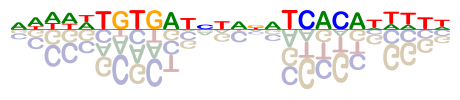

In [7]:
fig, ax = plt.subplots(figsize=[6.5,1.5])

# Create counts matrix
logo = logomaker.Logo(weight_df, 
                      ax=ax, 
                      center_values=False, 
                      fade_below=.7,
                      shade_below=.5,
                      font_name='Arial Rounded MT Bold')

# Style axes
logo.style_spines(visible=False)
ax.set_xticks([])
ax.set_yticks([])

# Tight layout
plt.tight_layout()

# Save as pdf
out_file = out_prefix+'.pdf'
fig.savefig(out_file)
print('Done! Output written to %s.'%out_file)

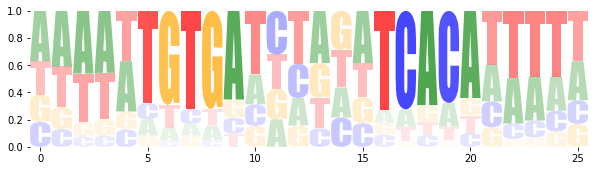

In [4]:
counts_df = logomaker.alignment_to_matrix(seqs, to_type='probability')

logo = logomaker.Logo(counts_df, 
                      fade_probabilities=True, 
                      show_spines=False, 
                      font_name='Impact')